# Decision Tree

In [24]:
# Decision Tree
# ---------------------------------------------

## Library
import pandas, datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import graphviz

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.utils import shuffle

In [5]:
## Loda data
Question_no_outlier = pandas.read_sql('Question_no_outlier', "sqlite:///Question_no_outlier.db", index_col='index')

Tags = pandas.read_csv("data/Tags.csv")
Tags = Tags.groupby("Id").count()
Question_no_outlier = pandas.merge(Question_no_outlier, Tags, on=["Id"])

In [7]:
## Convert timestamp to class

def respTime_to_class(x):
    in30min = 30*60
    in60min = 2*in30min
    in6hour = 6*in60min
    in12hour = 2*in6hour
    in1day = 2*in12hour
    in1week = 7*in1day
    in1month = 4*in1week
    inhalfyear = (366/2)*in1day
    in1year = 366*in1day

    if x["BestAns_RespTime_timestamp"] <= in30min:
        return 0
    elif x["BestAns_RespTime_timestamp"] <= in60min:
        return 1
    elif x["BestAns_RespTime_timestamp"] <= in6hour:
        return 2
    elif x["BestAns_RespTime_timestamp"] <= in12hour:
        return 3
    elif x["BestAns_RespTime_timestamp"] <= in1day:
        return 4
    elif x["BestAns_RespTime_timestamp"] <= in1week:
        return 5
    elif x["BestAns_RespTime_timestamp"] <= in1month:
        return 6
    elif x["BestAns_RespTime_timestamp"] <= inhalfyear:
        return 7
    elif x["BestAns_RespTime_timestamp"] <= in1year:
        return 8
    else :
        return 9
    

Question_no_outlier['label'] = Question_no_outlier.apply(respTime_to_class, axis=1)

In [8]:
Question_no_outlier.head()

,Id,Score,Title,Body,CreationDate_to_datetime,BestAnsTime,FirstAnsTime,CreationDate_to_daytime,CreationDate_to_daytime_timestamp,BestAns_RespTime_timestamp,BestAns_RespTime,Tag,label
0,80,26,7,293,1.217613e+09,1.217621e+09,1.217621e+09,2011-01-01 13:57:07,50227,7960.0,1970-01-01 02:12:40,3,2
1,90,144,7,24,1.217616e+09,1.253735e+09,1.217616e+09,2011-01-01 14:41:24,52884,36118762.0,1971-02-23 00:59:22,4,9
2,120,21,3,54,1.217620e+09,1.222224e+09,1.222224e+09,2011-01-01 15:50:08,57008,4603863.0,1970-02-23 06:51:03,3,7
3,180,53,5,41,1.217631e+09,1.217718e+09,1.217634e+09,2011-01-01 18:42:19,67339,87693.0,1970-01-02 00:21:33,4,5
4,260,49,6,169,1.217647e+09,1.217656e+09,1.217649e+09,2011-01-01 23:22:08,84128,8858.0,1970-01-01 02:27:38,4,2


In [33]:
## Split data into features and label
mydata = pandas.DataFrame()

for i in range(0, 10):
    mydata = mydata.append(Question_no_outlier[Question_no_outlier['label'] == i].sample(n=1000))
mydata = shuffle(mydata)

print(len(mydata))

feature_cols = ['Score', 'Title', 'Body', 'Tag']

X = Question_no_outlier[feature_cols] 
y = Question_no_outlier["label"] 

10000
0          2
1          9
2          7
3          5
4          2
          ..
1102523    0
1102524    0
1102525    1
1102526    0
1102527    0
Name: label, Length: 1102528, dtype: int64


In [10]:
## Split into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [19]:
## Decision Tree classifer
clf = DecisionTreeClassifier(max_depth=5)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48832835992369067


In [31]:
## Plot the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, feature_names=feature_cols)

graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

|--- feature_0 <= -0.50
|   |--- feature_0 <= -1.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- feature_0 <= -4.50
|   |   |   |   |--- feature_2 <= 419.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  419.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -4.50
|   |   |   |   |--- feature_2 <= 213.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  213.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  2.50
|   |   |   |--- feature_2 <= 373.50
|   |   |   |   |--- feature_0 <= -2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  373.50
|   |   |   |   |--- feature_0 <= -2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -2.50
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  -1.50
|   |   |--- feature_3 <= 3.50
|   |   |   |--- feature_2 <= 212.50
|   |   |   |   |--- feature_3 <= 2.50
|   |   |

[Text(167.4, 199.32, 'X[0] <= -0.5\ngini = 0.714\nsamples = 771769\nvalue = [376505, 75036, 126673, 31799, 35362, 53281, 22313, 27423\n11491, 11886]'),
 Text(83.7, 163.07999999999998, 'X[0] <= -1.5\ngini = 0.547\nsamples = 53422\nvalue = [34732, 5137, 7139, 1432, 1590, 2193, 794, 265, 80\n60]'),
 Text(41.85, 126.83999999999999, 'X[3] <= 2.5\ngini = 0.489\nsamples = 23424\nvalue = [16337, 2152, 2774, 535, 536, 715, 264, 72, 22, 17]'),
 Text(20.925, 90.6, 'X[0] <= -4.5\ngini = 0.446\nsamples = 12231\nvalue = [8943, 1029, 1285, 237, 227, 306, 137, 42, 15, 10]'),
 Text(10.4625, 54.359999999999985, 'X[2] <= 419.5\ngini = 0.319\nsamples = 1524\nvalue = [1248, 112, 101, 15, 14, 15, 12, 3, 4, 0]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.305\nsamples = 1410\nvalue = [1168, 101, 84, 12, 14, 13, 12, 2, 4, 0]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.475\nsamples = 114\nvalue = [80, 11, 17, 3, 0, 2, 0, 1, 0, 0]'),
 Text(31.387500000000003, 54.359999999999985, 'X[2] <= 213.5\

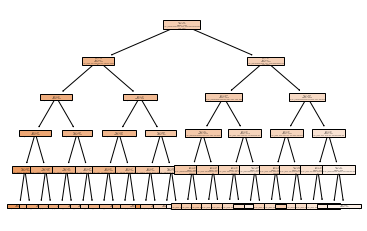

In [32]:
## Display the pplot
text_representation = tree.export_text(clf)

### Text
print(text_representation)

### Graph
tree.plot_tree(clf, filled = True)